In [1]:
#Jai Ganesh Deva

# DAEN - 690 Capstone Project


In [20]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Natural Language Processing Toolkit
import nltk
from nltk import word_tokenize,sent_tokenize
from nltk.corpus import stopwords

import os
from matplotlib.pylab import rcParams

In [94]:
plt.style.use("seaborn-whitegrid")

In [22]:
#Loading the dataset into dataframe 
os.chdir("E:\DAEN - 690")
bijli = pd.read_csv("Electronics_anatomical_features.csv")

In [23]:
bijli.index = np.arange(1,len(bijli) + 1)

In [24]:
bijli.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26365 entries, 1 to 26365
Data columns (total 21 columns):
reviewerID                 26365 non-null object
asin                       26365 non-null object
reviewerName               26365 non-null object
helpful                    26365 non-null object
unixReviewTime             26365 non-null int64
reviewText                 26365 non-null object
overall                    26365 non-null int64
reviewTime                 26365 non-null object
summary                    26365 non-null object
upvote                     26365 non-null int64
total_votes                26365 non-null int64
No.of Characters           26365 non-null int64
Number of Sentences        26365 non-null int64
No.of Question Marks       26365 non-null int64
No.of Exclamation Marks    26365 non-null int64
no.of Capital              26365 non-null int64
FRE                        26365 non-null float64
ARI                        26365 non-null float64
helpful_rating  

In [25]:
bijli.describe()

,unixReviewTime,overall,upvote,total_votes,No.of Characters,Number of Sentences,No.of Question Marks,No.of Exclamation Marks,no.of Capital,FRE,ARI,helpful_rating
count,2.636500e+04,26365.000000,26365.000000,26365.000000,26365.000000,26365.000000,26365.000000,26365.000000,26365.000000,26365.000000,26365.000000,26365.000000
mean,1.268155e+09,3.643543,58.599734,68.412630,1635.281927,18.050332,0.550465,1.359075,10.523876,74.237199,7.969611,0.747340
std,9.463474e+07,1.533671,276.069625,285.955755,1814.491723,18.605920,1.444861,3.106903,17.763067,11.205630,3.514912,0.267691
min,9.395136e+08,1.000000,0.000000,10.000000,19.000000,1.000000,0.000000,0.000000,0.000000,-197.330000,-2.100000,0.000000
25%,1.195258e+09,2.000000,9.000000,13.000000,545.000000,7.000000,0.000000,0.000000,2.000000,68.200000,6.100000,0.636364
50%,1.290816e+09,4.000000,15.000000,21.000000,1068.000000,12.000000,0.000000,0.000000,5.000000,74.290000,7.700000,0.852941
75%,1.347581e+09,5.000000,32.000000,43.000000,2058.000000,22.000000,1.000000,2.000000,12.000000,81.160000,9.400000,0.939394
max,1.405901e+09,5.000000,30735.000000,31453.000000,25560.000000,382.000000,35.000000,74.000000,513.000000,133.780000,139.800000,1.000000


In [26]:
#Data Cleaning

In [27]:
bijli["review"][1]

"An eReader without e-ink? Really?eReaders are devices dedicated to reading, and thus the main inconvenience they should avoid is eye-strain.By introducing a backlit eBook, B&N; removed the key point of eReaders.If you need a device that has a backlit screen (and can afford a $283 device), why wouldn't you pay the extra $200 to get an iPad, which does the job much more efficiently?Please, correct me if I'm wrong, because I really don't get the point of this device.Thanks. Why Would You Want To Do That?"

In [28]:
#Dropping Rendundant features
bijli = bijli.drop(["reviewerName","reviewTime","reviewText","summary","unixReviewTime","helpful"], axis = 1)

In [29]:
bijli.head(1)

,reviewerID,asin,overall,upvote,total_votes,No.of Characters,Number of Sentences,No.of Question Marks,No.of Exclamation Marks,no.of Capital,FRE,ARI,helpful_rating,Label_helpful,review
1,A23C0R77ZP9Z84,1400532655,3,1,22,396,3,4,0,1,73.88,8.8,0.045455,False,An eReader without e-ink? Really?eReaders are ...


In [30]:
bijli.review[1]

"An eReader without e-ink? Really?eReaders are devices dedicated to reading, and thus the main inconvenience they should avoid is eye-strain.By introducing a backlit eBook, B&N; removed the key point of eReaders.If you need a device that has a backlit screen (and can afford a $283 device), why wouldn't you pay the extra $200 to get an iPad, which does the job much more efficiently?Please, correct me if I'm wrong, because I really don't get the point of this device.Thanks. Why Would You Want To Do That?"

In [31]:
bijli["review"] = bijli["review"].replace('[^A-Za-z0-9]+'," ",regex = True)

# Visualization 

In [32]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline
plt.style.use("dark_background")


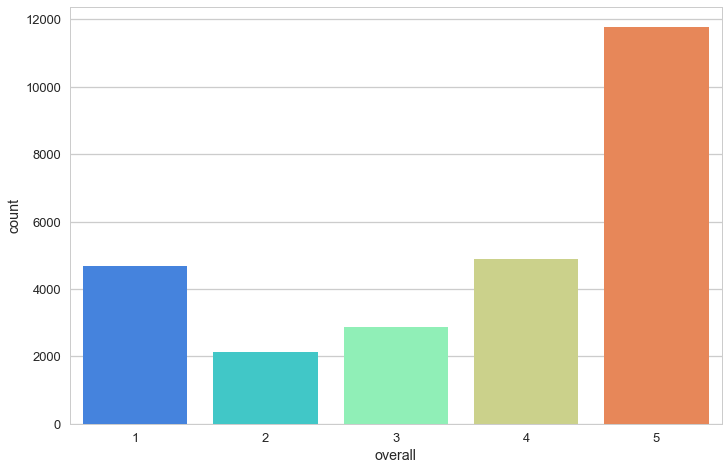

In [103]:
sns.countplot(x='overall',data=bijli,palette='rainbow')

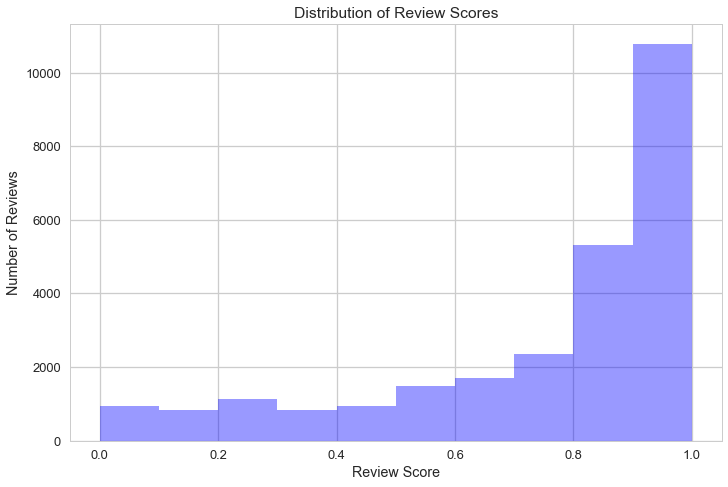

In [95]:
#Distribution of Review score
plt.figure()
plt.hist(bijli["helpful_rating"],facecolor = "blue",alpha = 0.4)
plt.title("Distribution of Review Scores")
plt.xlabel("Review Score")
plt.ylabel("Number of Reviews")

plt.show()


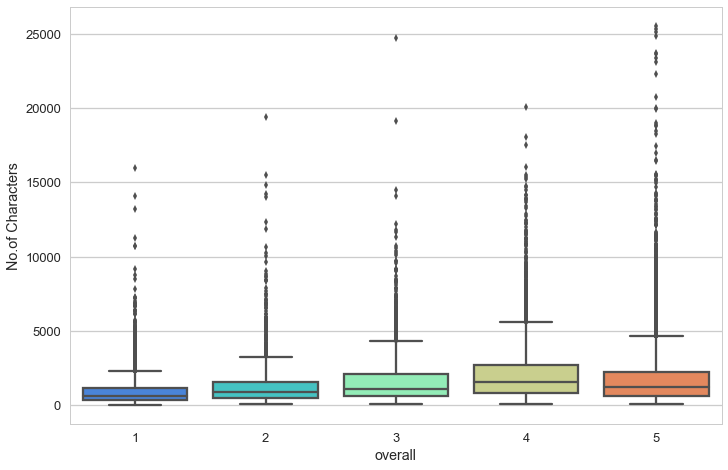

In [96]:
#Ratings vs No of characters
sns.boxplot(x='overall',y='No.of Characters',data=bijli,palette="rainbow",saturation= 0.7)


In [97]:
overall = bijli.groupby('overall').mean()
overall

,upvote,total_votes,No.of Characters,Number of Sentences,No.of Question Marks,No.of Exclamation Marks,no.of Capital,FRE,ARI,helpful_rating,Label_helpful
overall,,,,,,,,,,,
1,28.515792,46.677123,924.325224,11.431285,0.584294,1.184806,5.943875,75.103803,7.449488,0.541578,0.466923
2,29.119963,44.067010,1319.753515,14.941425,0.618557,0.988285,7.551546,74.363112,7.855248,0.551962,0.496720
3,56.622991,69.377009,1606.717331,17.553809,0.614256,0.930818,9.748428,74.380000,8.021733,0.655542,0.656883
4,74.468424,81.468629,2119.018598,22.661557,0.592888,1.185162,12.920090,73.477292,8.284958,0.824139,0.876967
5,69.786768,75.805598,1781.143596,19.450636,0.491603,1.671586,12.075997,74.150678,8.053511,0.854897,0.913401


In [98]:
overall.corr()

,upvote,total_votes,No.of Characters,Number of Sentences,No.of Question Marks,No.of Exclamation Marks,no.of Capital,FRE,ARI,helpful_rating,Label_helpful
upvote,1.000000,0.994717,0.933430,0.937147,-0.466098,0.470121,0.977130,-0.806227,0.867267,0.960094,0.970928
total_votes,0.994717,1.000000,0.914433,0.917633,-0.418169,0.417533,0.954299,-0.776076,0.845841,0.931553,0.944229
No.of Characters,0.933430,0.914433,1.000000,0.999512,-0.242310,0.271139,0.976978,-0.960400,0.980910,0.883375,0.901215
Number of Sentences,0.937147,0.917633,0.999512,1.000000,-0.258128,0.290582,0.979933,-0.960475,0.974879,0.892381,0.908685
No.of Question Marks,-0.466098,-0.418169,-0.242310,-0.258128,1.000000,-0.985598,-0.436820,0.093429,-0.127065,-0.654806,-0.626169
No.of Exclamation Marks,0.470121,0.417533,0.271139,0.290582,-0.985598,1.000000,0.456897,-0.155473,0.142265,0.675322,0.641730
no.of Capital,0.977130,0.954299,0.976978,0.979933,-0.436820,0.456897,1.000000,-0.897275,0.930473,0.961656,0.972593
FRE,-0.806227,-0.776076,-0.960400,-0.960475,0.093429,-0.155473,-0.897275,1.000000,-0.959326,-0.772590,-0.788386
ARI,0.867267,0.845841,0.980910,0.974879,-0.127065,0.142265,0.930473,-0.959326,1.000000,0.797807,0.823431
helpful_rating,0.960094,0.931553,0.883375,0.892381,-0.654806,0.675322,0.961656,-0.772590,0.797807,1.000000,0.998544


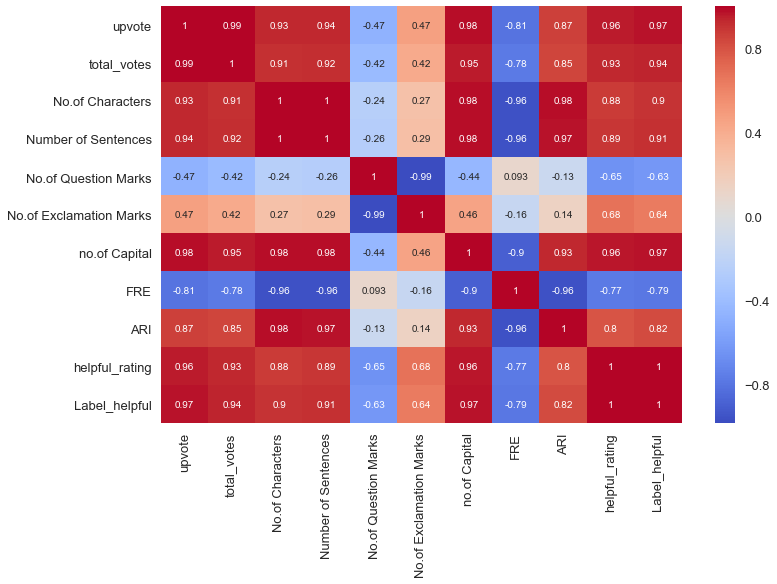

In [99]:
sns.heatmap(overall.corr(),cmap='coolwarm',annot=True)

In [100]:
#Helpfulness Score Vs No of Sentences

In [64]:
bijli.columns

Index(['reviewerID', 'asin', 'overall', 'upvote', 'total_votes',
       'No.of Characters', 'Number of Sentences', 'No.of Question Marks',
       'No.of Exclamation Marks', 'no.of Capital', 'FRE', 'ARI',
       'helpful_rating', 'Label_helpful', 'review'],
      dtype='object')

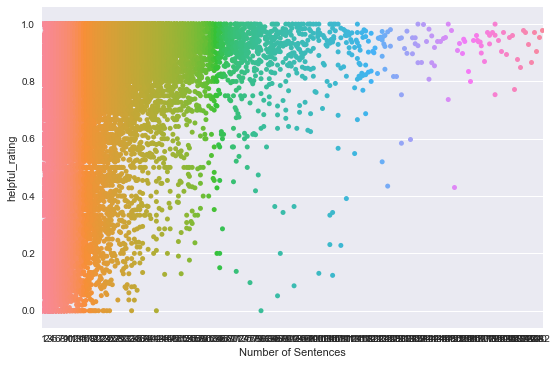

In [72]:
#Takes some time
sns.swarmplot(x = "Number of Sentences",y ="helpful_rating", data = bijli)

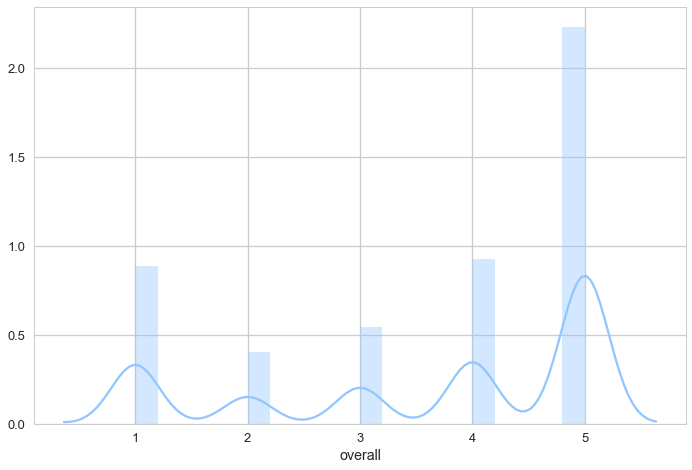

In [101]:
sns.distplot(bijli["overall"])

# TFIDF Matrix 
 
 We will only be doing Tokenization, Stemming and Stopwords removal.

In [22]:
from nltk.stem.snowball import SnowballStemmer

In [23]:
stemmer = SnowballStemmer("english")


In [24]:
def tokens(x):
    x = x.split()
    stems = []
    [stems.append(stemmer.stem(word)) for word in x]
    return stems

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
vect = TfidfVectorizer(tokenizer = tokens, stop_words = 'english', ngram_range=(1, 1), min_df = 0.01,lowercase = False)

In [27]:
%time bow = vect.fit_transform(bijli["review"])

Wall time: 2min 1s


In [29]:
bow = bow.toarray()

In [28]:
bow_mod = pd.DataFrame(bow.toarray())

In [24]:
bow_mod.columns = vect.get_feature_names()

In [25]:
bow_mod.head()

,0,00,000,1,10,100,1000,1080p,10x,11,...,xp,xt,yeah,year,yellow,yes,yesterday,youtub,zero,zoom
0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.02937,0.0,0.0,0.0,0.0,0.0,0.0
2,0.045097,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.051779,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
bow_mod["FRE"] = bijli["FRE"]
bow_mod["ARI"] = bijli["ARI"]
bow_mod["No.of Characters"] = bijli["No.of Characters"]
bow_mod["overall"] = bijli["overall"]
#bow_mod["reviewerID"] = bijli["reviewerID"]
#bow_mod["asin"] = bijli["asin"]
bow_mod["No.of Exclamation Marks"] = bijli["No.of Exclamation Marks"]

In [27]:
bow_mod.drop(0,inplace = True)

In [28]:
bow_mod = np.array(bow_mod)

In [35]:
# Binarizing the target Variable

In [317]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
lab_enc.fit(bijli['Label_helpful'])
variable = lab_enc.transform(bijli['Label_helpful'])
bijli['variable'] = variable
print (bijli['variable'])

1        0
2        1
3        1
4        0
5        0
6        1
7        1
8        1
9        0
10       0
11       1
12       0
13       1
14       1
15       1
16       1
17       1
18       1
19       0
20       0
21       1
22       0
23       1
24       1
25       0
26       1
27       0
28       0
29       1
30       0
        ..
26336    1
26337    1
26338    1
26339    1
26340    0
26341    1
26342    1
26343    0
26344    1
26345    1
26346    1
26347    1
26348    1
26349    1
26350    1
26351    0
26352    1
26353    1
26354    1
26355    1
26356    1
26357    1
26358    1
26359    1
26360    1
26361    1
26362    1
26363    1
26364    0
26365    0
Name: variable, Length: 26365, dtype: int64


In [31]:
bijli["Label_helpful"].drop(1,inplace = True)

In [110]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow,bijli['variable'], test_size=0.3, random_state=101)

C:\Users\vamsi\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


NameError: name 'bow' is not defined

# Machine Learning Models

We have implemented the following ML models.

1) Random Forest
2) Logistic Regression
3) Support Vector Machine
4) Decision Tree
5) Bagging
6) RNN & LSTM networks

# Random Forest

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
from sklearn.model_selection import GridSearchCV

In [106]:
from sklearn import metrics

In [107]:
rfclf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)

In [108]:
rfclf.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [109]:
probs = rfclf.predict_proba(X_test)

NameError: name 'X_test' is not defined

In [114]:
pred = probs[:,1]

In [115]:
from sklearn.metrics import confusion_matrix

In [116]:
from sklearn.metrics import accuracy_score

In [117]:
from sklearn.metrics import roc_curve

In [118]:
fpr, tpr, threshold = roc_curve(y_test, pred)

In [119]:
roc_auc = metrics.auc(fpr, tpr)

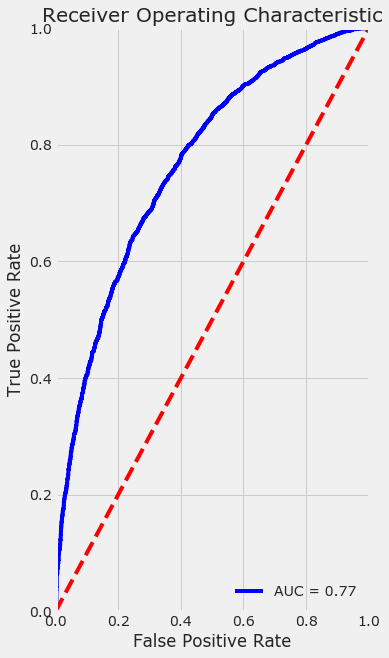

In [120]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.rcParams['font.family'] = 'Verdana'

plt.rcParams['figure.figsize'] = 10, 25
plt.show()

In [ ]:
y_test.shape

# Logsitic Regression

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
lm = LogisticRegression()

In [94]:
print(X_test)

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   2.08500000e+03
    4.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   7.92000000e+02
    5.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   4.39600000e+03
    3.00000000e+00   1.00000000e+00]
 ..., 
 [  0.00000000e+00   1.06935073e-01   0.00000000e+00 ...,   2.44000000e+02
    5.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   4.90000000e+02
    3.00000000e+00   1.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   1.82100000e+03
    4.00000000e+00   0.00000000e+00]]


In [95]:
lm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [96]:
probs = lm.predict_proba(X_test)

In [97]:
pred = probs[:,1]

In [98]:
fpr, tpr, threshold = roc_curve(y_test, pred)

In [99]:
roc_auc = metrics.auc(fpr, tpr)

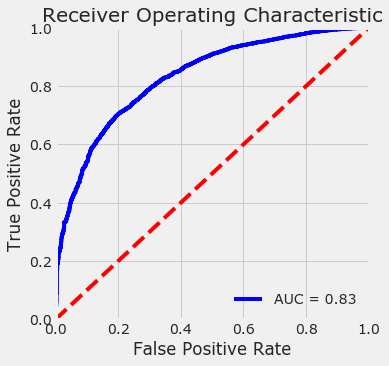

In [100]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.rcParams['font.family'] = 'Verdana'

plt.rcParams['figure.figsize'] = 5,5
plt.show()

In [ ]:
#accuracy_score(pred,y_test)

In [ ]:
accuracy_score(pred,y_test)

In [ ]:
plt.scatter(bow_mod, df["class_num"])
plt.plot(df["measurement"], model.predict_proba(X)[:, 1], color="r")
plt.xlabel("Measurement")
plt.ylabel("Probability of being in class B")
plt.show()

print "Accuracy", model.score(X, y)

# Linear SVM

In [107]:
from sklearn import svm

In [108]:
from sklearn.svm import LinearSVC

In [109]:
from sklearn.metrics import classification_report

In [110]:
from sklearn.svm import SVC

In [111]:
svm_clf = LinearSVC(C = 1,loss = "hinge")

In [112]:
svm_clf.fit(X_train,y_train)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [113]:
pred = svm_clf.predict(X_test)

In [114]:
from sklearn.metrics import accuracy_score

In [115]:
accuracy_score(y_test,pred)

0.80644753476611886

In [116]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

      False       0.67      0.37      0.48      1888
       True       0.83      0.94      0.88      6022

avg / total       0.79      0.81      0.79      7910



In [97]:
y_score = svm_clf.fit(X_train, y_train).decision_function(X_test)

# Radial Basis Function

In [117]:
rbf_kernel_svm_clf = SVC(kernel="rbf", gamma=5, C=0.001)

In [118]:
rbf_kernel_svm_clf.fit(X_train,y_train)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [120]:
pred = rbf_kernel_svm_clf.predict(X_test)

In [121]:
accuracy_score(y_test,pred)

0.76131479140328695

In [122]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

      False       0.00      0.00      0.00      1888
       True       0.76      1.00      0.86      6022

avg / total       0.58      0.76      0.66      7910



C:\Users\vamsi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Polynomial SVM

In [123]:
poly_clf = SVC(kernel="poly", degree=3, coef0=1, C=5)

In [124]:
poly_clf.fit(X_train,y_train)

SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [125]:
pred = poly_clf.predict(X_test)

In [126]:
accuracy_score(y_test,pred)

0.76131479140328695

In [127]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

      False       0.00      0.00      0.00      1888
       True       0.76      1.00      0.86      6022

avg / total       0.58      0.76      0.66      7910



C:\Users\vamsi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Decision Tree

In [128]:
from sklearn.metrics import accuracy_score

In [129]:
plt.style.use("seaborn-darkgrid")

In [130]:
from sklearn.metrics import roc_curve

In [131]:
from sklearn import metrics

In [132]:
from sklearn.metrics import confusion_matrix

In [133]:
from sklearn.tree import DecisionTreeClassifier

In [134]:
tree_clf = DecisionTreeClassifier()

In [135]:
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [136]:
pred = tree_clf.predict(X_test)

In [137]:
probs = tree_clf.predict_proba(X_test)

In [138]:
prediction = probs[:,1]

In [139]:
fpr, tpr, threshold = roc_curve(y_test, prediction)

In [140]:
roc_auc = metrics.auc(fpr, tpr)

In [142]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

      False       0.39      0.39      0.39      1888
       True       0.81      0.81      0.81      6022

avg / total       0.71      0.71      0.71      7910



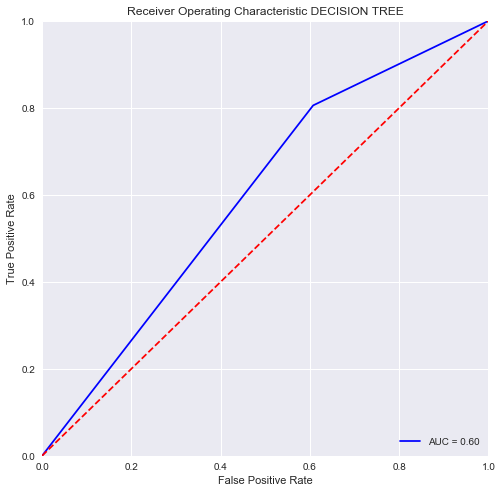

In [143]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic DECISION TREE')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.rcParams['font.family'] = 'Verdana'

plt.rcParams['figure.figsize'] = 8,8
plt.show()

In [144]:
accuracy_score(y_test,pred)

0.70695322376738301

# Bagging

In [145]:
#Bagging

In [146]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [147]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,max_samples=100, bootstrap=True, n_jobs=-1)

In [148]:
bag_clf.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [156]:
pred = bag_clf.predict(X_test)

In [150]:
probs = bag_clf.predict_proba(X_test)

In [151]:
prediction = probs[:,1]

In [152]:
fpr, tpr, threshold = roc_curve(y_test, prediction)

In [153]:
roc_auc = metrics.auc(fpr, tpr)

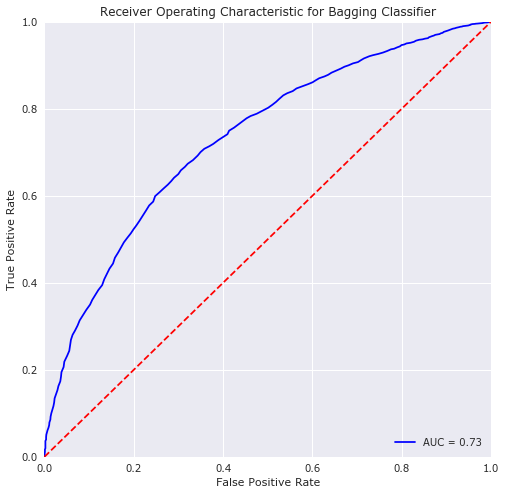

In [154]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Bagging Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.rcParams['font.family'] = 'Verdana'

plt.rcParams['figure.figsize'] = 8,8
plt.show()

In [157]:
accuracy_score(y_test,pred)

0.76131479140328695

In [158]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

      False       0.00      0.00      0.00      1888
       True       0.76      1.00      0.86      6022

avg / total       0.58      0.76      0.66      7910



C:\Users\vamsi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Naive Bayes Classifier

In [159]:
from sklearn.naive_bayes import GaussianNB

In [160]:
NB_clf = GaussianNB()

In [161]:
NB_clf.fit(X_train,y_train)

GaussianNB(priors=None)

In [167]:
prediction = NB_clf.predict(X_test)

In [162]:
probs = NB_clf.predict_proba(X_test)

In [163]:
pred = probs[:,1]

In [164]:
fpr, tpr, threshold = roc_curve(y_test, pred)

In [165]:
roc_auc = metrics.auc(fpr, tpr)

In [168]:
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

      False       0.41      0.62      0.49      1888
       True       0.86      0.72      0.79      6022

avg / total       0.75      0.70      0.72      7910



In [169]:
accuracy_score(y_test,prediction)

0.69873577749683946

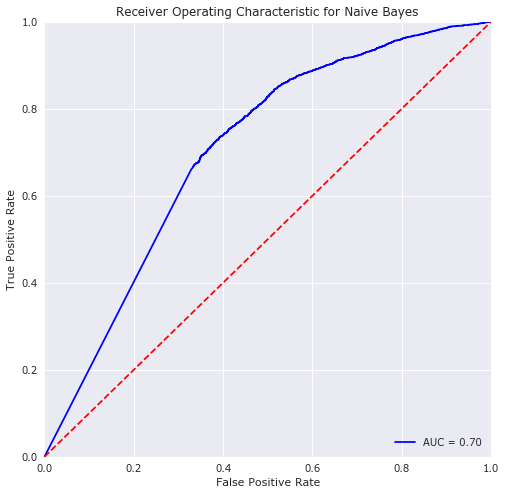

In [166]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Naive Bayes')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.rcParams['font.family'] = 'Verdana'

plt.rcParams['figure.figsize'] = 8,8
plt.show()

In [ ]:
# Multinomial Naive Bayes

In [171]:
from sklearn.naive_bayes import MultinomialNB

In [172]:
mnb_clf = MultinomialNB().fit(X_train, y_train)

In [180]:
pred = mnb_clf.predict(X_test)

In [173]:
probs  = mnb_clf.predict_proba(X_test)

In [174]:
prediction = probs[:,1]

In [175]:
fpr, tpr, threshold = roc_curve(y_test, prediction)

In [176]:
roc_auc = metrics.auc(fpr, tpr)

In [181]:
accuracy_score(y_test,pred)

0.77332490518331232

In [182]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

      False       0.71      0.09      0.15      1888
       True       0.78      0.99      0.87      6022

avg / total       0.76      0.77      0.70      7910



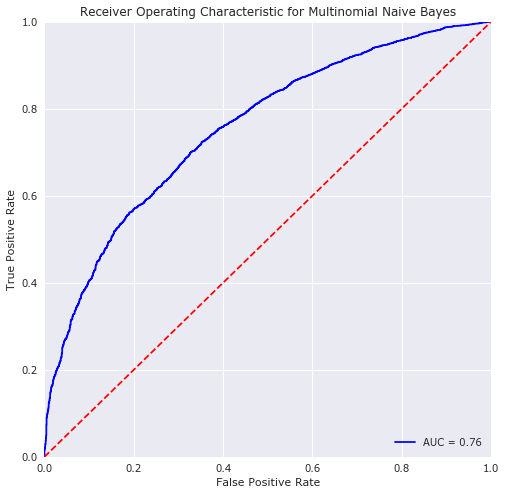

In [177]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Multinomial Naive Bayes')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.rcParams['font.family'] = 'Verdana'

plt.rcParams['figure.figsize'] = 8,8
plt.show()

# Multi - layer Perceptron 

In [183]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [184]:

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [185]:
from sklearn.neural_network import MLPClassifier

In [204]:
mlp = MLPClassifier(hidden_layer_sizes=(150,150,150))


In [205]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(150, 150, 150), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [206]:
pred = mlp.predict(X_test)

In [207]:
probs = mlp.predict_proba(X_test)

In [208]:
predictions = probs[:,1]

In [209]:
fpr, tpr, threshold = roc_curve(y_test, predictions)

In [210]:
roc_auc = metrics.auc(fpr, tpr)

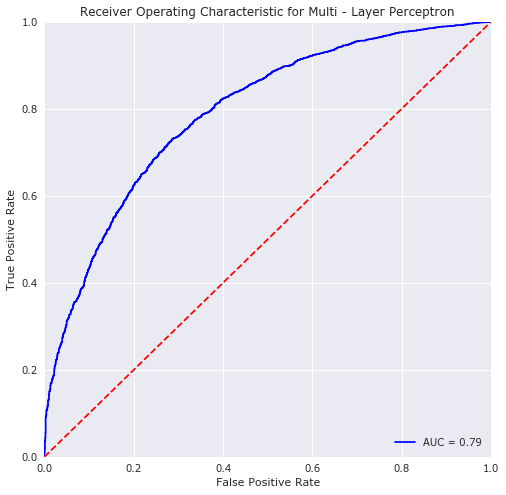

In [211]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Multi - Layer Perceptron')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.rcParams['font.family'] = 'Verdana'

plt.rcParams['figure.figsize'] = 8,8
plt.show()

In [213]:
accuracy_score(y_test,pred)

0.79292035398230087

In [214]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

      False       0.59      0.44      0.51      1888
       True       0.84      0.90      0.87      6022

avg / total       0.78      0.79      0.78      7910



# Passive Aggresive CLassifier

In [216]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [258]:
pas_clf = PassiveAggressiveClassifier(random_state=0, C = 1, loss = "log")

In [259]:
pas_clf.fit(X_train, y_train)

C:\Users\vamsi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


PassiveAggressiveClassifier(C=1, average=False, class_weight=None,
              fit_intercept=True, loss='log', max_iter=None, n_iter=None,
              n_jobs=1, random_state=0, shuffle=True, tol=None, verbose=0,
              warm_start=False)

In [260]:
pred = pas_clf.predict(X_test)

In [266]:
accuracy_score(y_test,pred)

0.74513274336283186

In [267]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

      False       0.46      0.43      0.45      1888
       True       0.83      0.84      0.83      6022

avg / total       0.74      0.75      0.74      7910



# SGD Classifier

In [224]:
from sklearn.linear_model import SGDClassifier

In [247]:
sgd_clf = SGDClassifier(loss = "log",alpha=0.0001,n_iter= 100)

In [248]:
sgd_clf.fit(X_train,y_train)

C:\Users\vamsi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=100,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [249]:
pred = sgd_clf.predict(X_test)

In [250]:
accuracy_score(y_test,pred)

0.7605562579013907

In [251]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

      False       0.50      0.44      0.47      1888
       True       0.83      0.86      0.85      6022

avg / total       0.75      0.76      0.76      7910



In [252]:
probs = sgd_clf.predict_proba(X_test)

In [253]:
predictions = probs[:,1]

In [254]:
fpr, tpr, threshold = roc_curve(y_test, predictions)

In [255]:
roc_auc = metrics.auc(fpr, tpr)

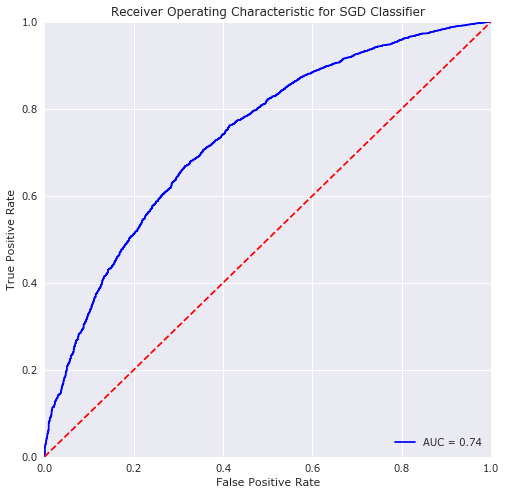

In [257]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for SGD Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.rcParams['font.family'] = 'Verdana'

plt.rcParams['figure.figsize'] = 8,8
plt.show()

# RIDGE CLASSIFIER

In [269]:
from sklearn.linear_model import RidgeClassifier

In [270]:
rdg_clf = RidgeClassifier(alpha=1.0, fit_intercept=True, normalize=False,solver='auto',max_iter=100)

In [271]:
rdg_clf.fit(X_train,y_train)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=100, normalize=False, random_state=None, solver='auto',
        tol=0.001)

In [272]:
pred = rdg_clf.predict(X_test)

In [273]:
accuracy_score(y_test,pred)

0.80113780025284453

In [274]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

      False       0.64      0.38      0.48      1888
       True       0.83      0.93      0.88      6022

avg / total       0.78      0.80      0.78      7910



# Classifier Comparision

In [ ]:
def train_predict(clf, X_train, y_train, X_test, y_test):
    
    
   
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, X_train.shape[0]))
    
   
    train_classifier(clf, X_train, y_train)
    
    
    print ("ROC_AUC score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
    print ("ROC_AUC score for test set: {:.4f}.\n".format(predict_labels(clf, X_test, y_test)))

In [37]:
from sklearn.metrics import roc_auc_score, roc_curve

def train_classifier(clf, X_train, y_train):
    
    
    
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
   
    print ("Trained model in {:.4f} seconds".format(end - start))

In [40]:
def predict_labels(clf, features, target):
    
    
   
    start = time()
    probas = clf.predict_proba(features)
    end = time()
    
 
    print ("Made predictions in {:.4f} seconds.".format(end - start))
    return roc_auc_score(target.values, probas[:,1].T)

In [41]:
def clf_test_roc_score(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    probas = probas =clf.predict_proba(X_test)
    return roc_auc_score(y_test, probas[:,1].T)

In [292]:

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


# Initialize the models using a random state were applicable.
clf_list = [GaussianNB(),
            BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,max_samples=100, bootstrap=True, n_jobs=-1), 
            MLPClassifier(hidden_layer_sizes=(150,150,150)),
            SGDClassifier(loss = "log"),
            DecisionTreeClassifier(random_state = 101)]
x_tr = X_train
x_te = X_test


# Set up the training set sizes for 100, 200 and 300 respectively.
train_feature_list = [x_tr[0:10000],x_tr[0:20000],x_tr]
train_target_list = [y_train[0:10000], y_train[0:20000], y_train]


# Execute the 'train_predict' function for each of the classifiers and each training set size
for clf in clf_list:
    for a, b in zip(train_feature_list, train_target_list):
        train_predict(clf, a, b, x_te, y_test)

Training a GaussianNB using a training set size of 10000. . .
Trained model in 0.3745 seconds
Made predictions in 0.4321 seconds.
ROC_AUC score for training set: 0.8033.
Made predictions in 0.3554 seconds.
ROC_AUC score for test set: 0.6953.

Training a GaussianNB using a training set size of 18455. . .
Trained model in 0.6404 seconds
Made predictions in 0.8540 seconds.
ROC_AUC score for training set: 0.7753.
Made predictions in 0.3640 seconds.
ROC_AUC score for test set: 0.7054.

Training a GaussianNB using a training set size of 18455. . .
Trained model in 0.6444 seconds
Made predictions in 0.8658 seconds.
ROC_AUC score for training set: 0.7753.
Made predictions in 0.3484 seconds.
ROC_AUC score for test set: 0.7054.

Training a BaggingClassifier using a training set size of 10000. . .
Trained model in 49.6709 seconds
Made predictions in 46.4207 seconds.
ROC_AUC score for training set: 0.7881.
Made predictions in 36.4676 seconds.
ROC_AUC score for test set: 0.7423.

Training a Bagging

C:\Users\vamsi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Trained model in 0.3480 seconds
Made predictions in 0.0290 seconds.
ROC_AUC score for training set: 0.8008.
Made predictions in 0.0221 seconds.
ROC_AUC score for test set: 0.6567.

Training a SGDClassifier using a training set size of 18455. . .


C:\Users\vamsi\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


Trained model in 0.7099 seconds
Made predictions in 0.0501 seconds.
ROC_AUC score for training set: 0.7613.
Made predictions in 0.0216 seconds.
ROC_AUC score for test set: 0.6746.

Training a SGDClassifier using a training set size of 18455. . .
Trained model in 0.6924 seconds
Made predictions in 0.0511 seconds.
ROC_AUC score for training set: 0.7550.
Made predictions in 0.0221 seconds.
ROC_AUC score for test set: 0.6748.

Training a DecisionTreeClassifier using a training set size of 10000. . .
Trained model in 13.7790 seconds
Made predictions in 0.0541 seconds.
ROC_AUC score for training set: 1.0000.
Made predictions in 0.0431 seconds.
ROC_AUC score for test set: 0.5931.

Training a DecisionTreeClassifier using a training set size of 18455. . .
Trained model in 39.6136 seconds
Made predictions in 0.0953 seconds.
ROC_AUC score for training set: 1.0000.
Made predictions in 0.0426 seconds.
ROC_AUC score for test set: 0.5939.

Training a DecisionTreeClassifier using a training set size o

C:\Users\vamsi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\vamsi\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


NameError: name 'FIG_SIZE' is not defined

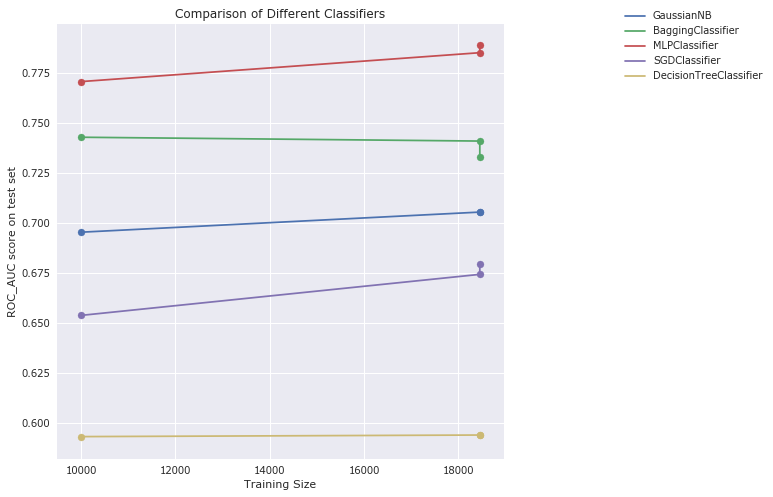

In [293]:
                                                            
for clf in clf_list:
    x_graph = []
    y_graph = []
    for a, b in zip(train_feature_list, train_target_list):
        y_graph.append(clf_test_roc_score(clf, a, b, x_te, y_test))
        x_graph.append(len(a))
    plt.scatter(x_graph,y_graph)
    plt.plot(x_graph,y_graph, label = clf.__class__.__name__)

plt.title('Comparison of Different Classifiers')
plt.xlabel('Training Size')
plt.ylabel('ROC_AUC score on test set')
plt.legend(bbox_to_anchor=(1.6, 1.05))
plt.figure(figsize=FIG_SIZE)             
plt.show()